1)Problem :From the bigmart sales data collected for 1559 products and 10 stores in 2013 which contains attributes(columns) about the details of that particular product and the store 

In [ ]:
import pandas as pd
df=pd.read_csv('Train.csv')

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


2)HYPOTHESIS GENERATION


*   Item_Weight is a numerical value hence it can affect the sales in that particular outlet
*   Sales may be dependent on the Item_Fat_Content.

*   More Visibilty may be due to higher price of the product to increase sales in turn increase profit.
*   Item_Type - perishable items may be sold frequently hence more sales .


*   Higher the MRP more the sales 
*  Outlets established earlier may have higher sales 

*   More the outlet size more would be the sales
*  Location of the stores may affect the sales .


*  Supermarket's type may also affect the Outlet sales.


3)LOADING PACKAGES AND DATA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train=pd.read_csv('Train.csv')
test=pd.read_csv('Test.csv')

4)DATA STRUCTURE AND CONTENT

In [ ]:
#We can aobserve that the training data contains the target variable -->Item_Outlet_Sales
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
#And the test data does not  contain the target variable
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [ ]:
len(train) , train.shape , len(test) , test.shape

(8523, (8523, 12), 5681, (5681, 11))

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


NUMERICAL VARIABLES:


1.   Item_Weight
2. Item_Visibility 
3.   Item_MRP
4.  Item_Outlet_Sales 

CATEGORICAL VARIABLES:


1.   Item_Identifier
2.   Item_Fat_Content 
3.    Item_Type 
4.  Outlet_Identifier  
5.   Outlet_Size
6.  Outlet_Location_Type 
7.   Outlet_Type 





















5)EXPLORATORY DATA ANALYSIS

In [ ]:
#MISSING VALUES
train.isnull().sum()
#as we can see , we have 1463 missing values in the Item_Weight column and 2410 missing values in the Outlet_Size column.

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

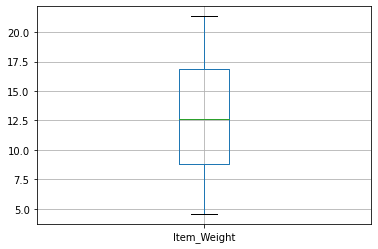

In [ ]:
train.boxplot(column=['Item_Weight'])
#since outlier are not there we can use mean to fill the null values

In [ ]:
#Imputatation of the missing values are done here
mean1 = train['Item_Weight'].mean()
train['Item_Weight'].replace(np.nan,mean1,inplace=True)

In [ ]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
#Since Outlet_Size is a categorical variable we replace it with mode i.e the most repeated value
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])

In [ ]:
train.isnull().sum()


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

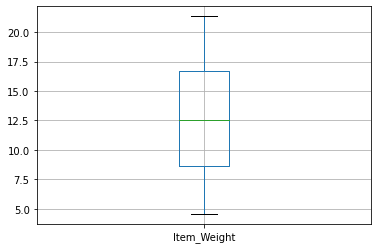

In [ ]:
test.boxplot(column=['Item_Weight'])

In [ ]:
#Hence there are no duplicate data present
duplicate = train.duplicated()
print(duplicate.sum())


0


In [ ]:
#We can see that the fat content present here
#we have low fat labelled as LF and low fat , also Regular has an alias of reg , therefore to avoid this we need to make all the same 
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
train['Item_Fat_Content'].replace('LF','Low Fat',inplace=True)
train['Item_Fat_Content'].replace('low fat','Low Fat',inplace=True)
train['Item_Fat_Content'].replace('reg','Regular',inplace=True)

In [ ]:
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
miss_values = train['Outlet_Size'].isnull().sum()
miss_values

0

 6)UNIVARIATE AND BIVARIATE ANALYSIS





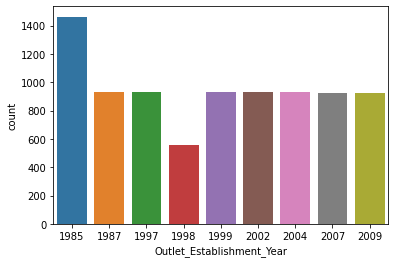

In [ ]:
sns.countplot(x='Outlet_Establishment_Year', data=train)
plt.show()
#FROM this we can see there are a lot of stores established in the year 1985 and lowest in 1998 . And the rest remain nearly same

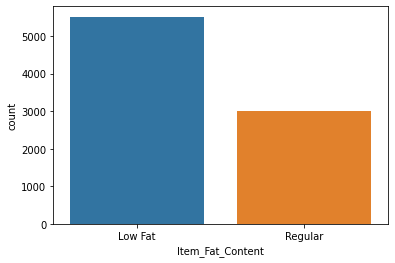

In [ ]:
sns.countplot(x="Item_Fat_Content",data=train)

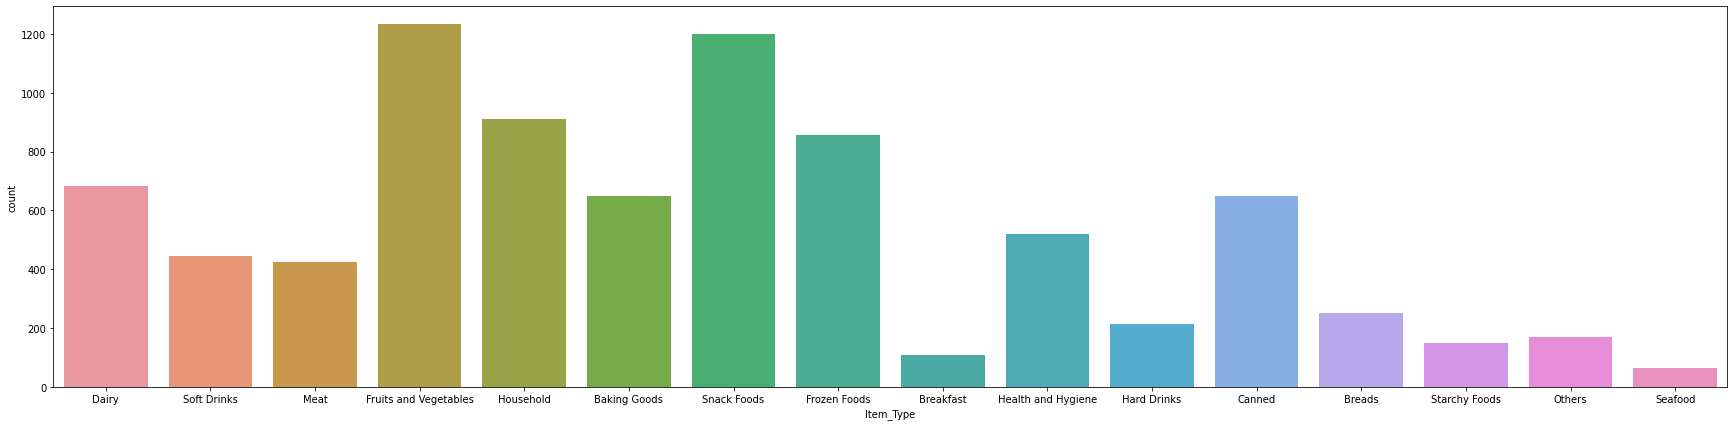

In [ ]:
plt.figure(figsize=(30,7))
sns.countplot(x="Item_Type",data=train)
plt.show()
#From this we can coclude that the Fruits and vegetables , Snack foods constitute majority of the count 

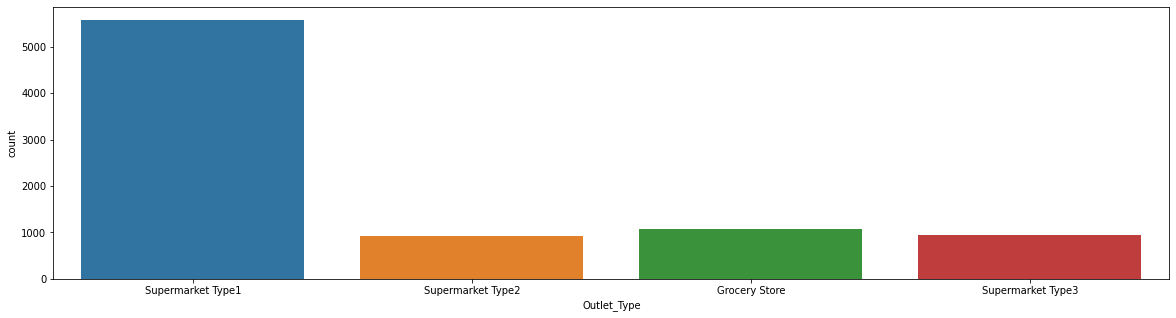

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(x="Outlet_Type",data=train)
#from this we can see that the Supermarket type 1 has most of the branches established

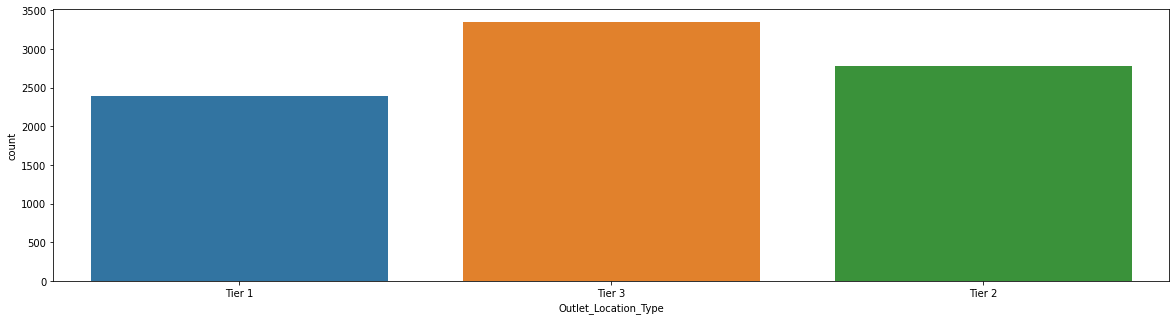

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(x="Outlet_Location_Type",data=train)
#tier 3 outlets are the more dominant among the location type

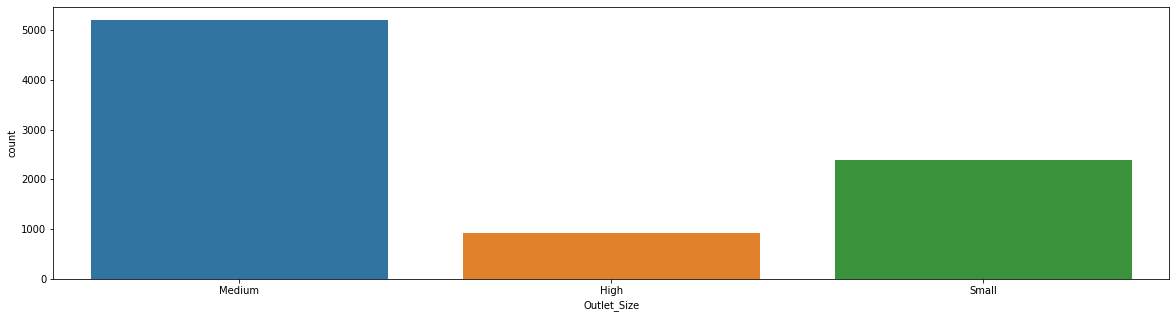

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(x="Outlet_Size",data=train)
#as we can see that the size of the outlet is majority of the outlets are of medium size.

In [ ]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

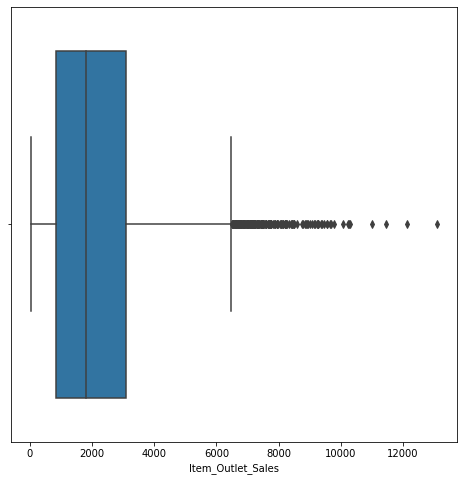

In [ ]:
#From this we come to know that Item outlet sales contains outliers
#therefore we need to remove these outliers
plt.figure(figsize = (8,8))
sns.boxplot(x = 'Item_Outlet_Sales', data = train);

In [ ]:
def removeoutliers(df,column):
  Q3=df[column].quantile(0.75)
  Q1=df[column].quantile(0.25)
  IQR=Q3-Q1
  upper=Q3+(1.5*IQR)
  lower=Q1-(1.5*IQR)
  df=df[(df[column]>lower)&(df[column]<upper)]
  return df

In [ ]:
#We have removed the outliers in the Item_Outlet_sales column
train=removeoutliers(train,'Item_Outlet_Sales')

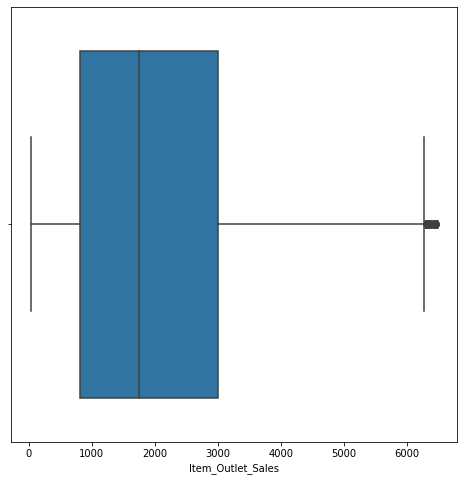

In [ ]:
#After removal of outliers
plt.figure(figsize = (8,8))
sns.boxplot(x = 'Item_Outlet_Sales', data = train);

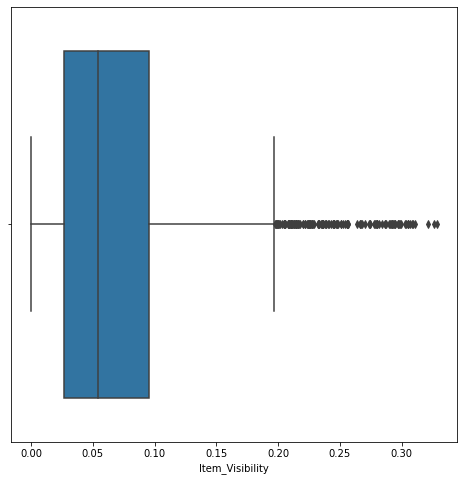

In [ ]:
#We can see that the visibility also contains outliers and should be remove as above
plt.figure(figsize = (8,8))
sns.boxplot(x = 'Item_Visibility', data = train);

In [ ]:
train=removeoutliers(train,'Item_Visibility')

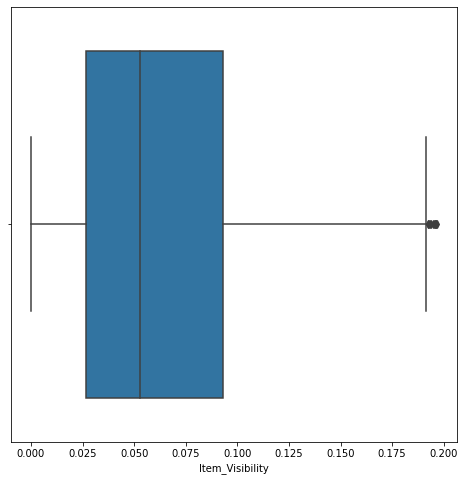

In [ ]:
#after reoving outliers from Item_Visibility
plt.figure(figsize = (8,8))
sns.boxplot(x = 'Item_Visibility', data = train);

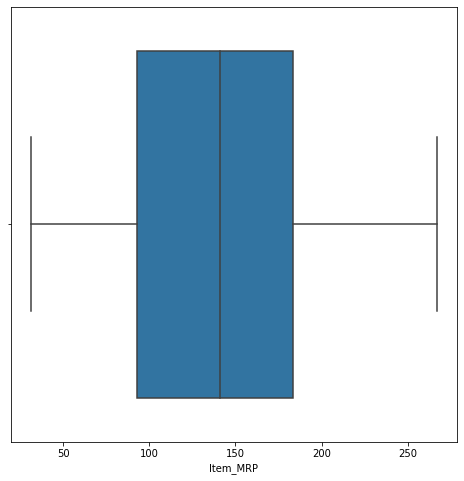

In [ ]:
#No outliers are present
plt.figure(figsize = (8,8))
sns.boxplot(x = 'Item_MRP', data = train);

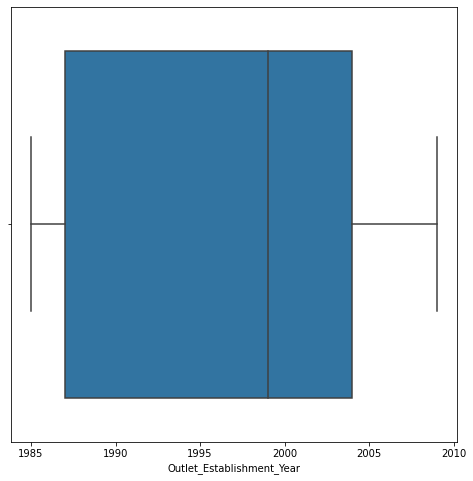

In [ ]:
#This too doesn't seem to contain any outliers
plt.figure(figsize = (8,8))
sns.boxplot(x = 'Outlet_Establishment_Year', data = train);

In [ ]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

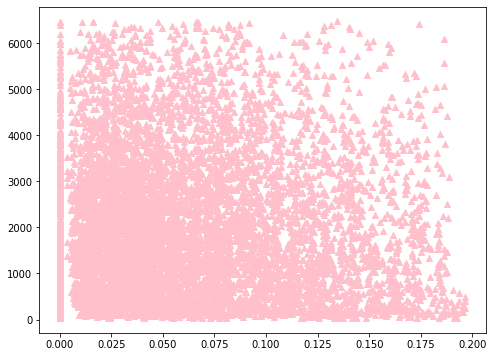

In [ ]:
plt.figure(figsize =(8,6))
plt.scatter(  train['Item_Visibility'], train['Item_Outlet_Sales'],c='pink',marker="^")
#There is no linear relationship between these 2 variables

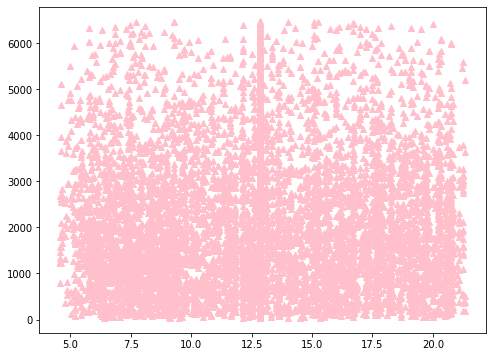

In [ ]:

plt.figure(figsize =(8,6))
plt.scatter(  train['Item_Weight'], train['Item_Outlet_Sales'],c='pink',marker="^")
#similarly there is no linear relationship between these 2 varaibles

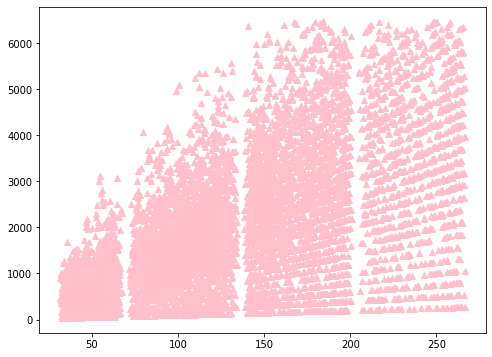

In [ ]:
plt.figure(figsize =(8,6))
plt.scatter(  train['Item_MRP'], train['Item_Outlet_Sales'],c='pink',marker="^")
#somesort of a positive linear relationship exits here

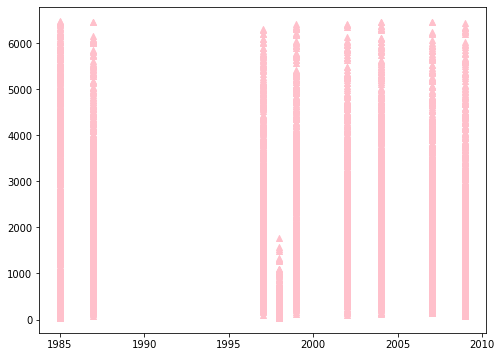

In [ ]:
plt.figure(figsize =(8,6))
plt.scatter(  train['Outlet_Establishment_Year'], train['Item_Outlet_Sales'],c='pink',marker="^")

LABEL ENCODING OF THE CATEGORICAL VARIABLES ARE DONE HERE

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
train['Item_Fat_Content'] = encoder.fit_transform(train['Item_Fat_Content'])

train['Outlet_Size'] = encoder.fit_transform(train['Outlet_Size'])

train['Item_Type'] = encoder.fit_transform(train['Item_Type'])

train['Outlet_Identifier'] = encoder.fit_transform(train['Outlet_Identifier'])

train['Outlet_Type'] = encoder.fit_transform(train['Outlet_Type'])

train['Outlet_Location_Type'] = encoder.fit_transform(train['Outlet_Location_Type'])

In [ ]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,DRC01,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,FDN15,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,FDX07,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,NCD19,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


**HERE THE COLUMNS WHICH DOESNT CONTRIBUTE TO THE PREDICTION ARE DROPPED**

In [ ]:
drop_columns = ['Outlet_Establishment_Year','Item_Identifier']
train.drop(drop_columns, axis =1 , inplace = True) 

In [ ]:
train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,4,249.8092,9,1,0,1,3735.1380
1,5.920,1,0.019278,14,48.2692,3,1,2,2,443.4228
2,17.500,0,0.016760,10,141.6180,9,1,0,1,2097.2700
3,19.200,1,0.000000,6,182.0950,0,1,2,0,732.3800
4,8.930,0,0.000000,9,53.8614,1,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1,0,2,1,2778.3834
8519,8.380,1,0.046982,0,108.1570,7,1,1,1,549.2850
8520,10.600,0,0.035186,8,85.1224,6,2,1,1,1193.1136
8521,7.210,1,0.145221,13,103.1332,3,1,2,2,1845.5976


In [ ]:
X = train.drop(columns='Item_Outlet_Sales', axis=1)
y = train['Item_Outlet_Sales']

In [ ]:
print(X)

      Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0           9.300                 0         0.016047          4  249.8092   
1           5.920                 1         0.019278         14   48.2692   
2          17.500                 0         0.016760         10  141.6180   
3          19.200                 1         0.000000          6  182.0950   
4           8.930                 0         0.000000          9   53.8614   
...           ...               ...              ...        ...       ...   
8518        6.865                 0         0.056783         13  214.5218   
8519        8.380                 1         0.046982          0  108.1570   
8520       10.600                 0         0.035186          8   85.1224   
8521        7.210                 1         0.145221         13  103.1332   
8522       14.800                 0         0.044878         14   75.4670   

      Outlet_Identifier  Outlet_Size  Outlet_Location_Type  Outlet_Type  
0

In [ ]:
print(y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8196, dtype: float64


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X1 = scaler.fit_transform(X)
X = pd.DataFrame(data = X1, columns = X.columns)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6556, 9), (1640, 9), (6556,), (1640,))

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(8196, 9) (6556, 9) (1640, 9)


# MODELLING

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr_predict = lr.predict(X_test)

In [ ]:

print("R2 Score:", r2_score(y_test, lr_predict))
print("Mean Squarred Error:", mean_squared_error(y_test, lr_predict))
print("RMSE:", math.sqrt(mean_squared_error(y_test, lr_predict)))
print("Mean Absolute Error : " + str(mean_absolute_error(y_test,lr_predict)))

R2 Score: 0.47469698730524024
Mean Squarred Error: 1154767.8126105382
RMSE: 1074.6012342308836
Mean Absolute Error : 828.7029376098133


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#hyperparameters are tuned
rf = RandomForestRegressor(n_estimators = 50, max_depth = 15, random_state = 47, min_samples_leaf = 10)

In [ ]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, min_samples_leaf=10, n_estimators=50,
                      random_state=47)

In [ ]:
rf_pred = rf.predict(X_test)

In [ ]:
print("R2 Score:", r2_score(y_test, rf_pred))
print("Mean Squarred Error:", mean_squared_error(y_test, rf_pred))
print("RMSE:", math.sqrt(mean_squared_error(y_test, rf_pred)))
print("Mean Absolute Error : " + str(mean_absolute_error(y_test,rf_pred)))

R2 Score: 0.5665485582735912
Mean Squarred Error: 952851.5183409731
RMSE: 976.1411364864064
Mean Absolute Error : 710.3289072546038


In [ ]:
from xgboost import XGBRegressor
from sklearn import metrics
regressor = XGBRegressor()

In [ ]:

#Training data is in X_train and the corresponding price value is in the y_train
regressor.fit(X_train, y_train)

[14:21:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
data_prediction = regressor.predict(X_test)

In [ ]:
print("R2 Score:", r2_score(y_test,data_prediction))
print("Mean Squarred Error:", mean_squared_error(y_test, data_prediction))
print("RMSE:", math.sqrt(mean_squared_error(y_test, data_prediction)))
print("Mean Absolute Error : " + str(mean_absolute_error(y_test,data_prediction)))

R2 Score: 0.5743368983062795
Mean Squarred Error: 935730.4964430068
RMSE: 967.3316372594286
Mean Absolute Error : 704.3812143034177
